In [1]:
from pathlib import Path 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from collections import OrderedDict
import sys
import os
import seaborn as sns

In [2]:
data_root = '/Volumes/Samsung_T5/MIT/mta'
#os.listdir(data_root)

In [18]:
end_treat_file = 'debrief1401.txt'
cost_file = 'Collection_Documents/Derived Variables/B Excel Database/COST.xlsx' # find subject group assignment here 
defs_end_treat_file = 'dict/debrief1401_definitions.csv'

end_treat = pd.read_csv(Path(data_root, end_treat_file), delimiter='\t')
cost = pd.read_excel(Path(data_root, cost_file))
end_treat_defs = pd.read_csv(Path(data_root, defs_end_treat_file), usecols= ['ElementName', 'ElementDescription'])

# colums are uppercase in original cost file 
cost_cols = [col.lower() for col in cost.columns]
cost.columns = cost_cols
cost.keys()

Index(['subjectkey', 'src_subject_id', 'interview_age', 'interview_date',
       'gender', 'site', 'sjtyp', 'trtname', 'cmed', 'cteach', 'cdocs',
       'ctotal'],
      dtype='object')

In [5]:
end_treat = end_treat.dropna(subset=['interview_date'])

In [22]:
end_treat_defs.head()


,ElementName,ElementDescription
0,subjectkey,The NDAR Global Unique Identifier (GUID) for r...
1,src_subject_id,Subject ID how it's defined in lab/project
2,interview_date,Date on which the interview/genetic test/sampl...
3,interview_age,Age in months at the time of the interview/tes...
4,sex,Sex of subject at birth


In [30]:
end_treat['interview_date']

0      Date on which the interview/genetic test/sampl...
1                                             10/16/1998
2                                             09/13/1996
3                                             06/10/1996
4                                             07/17/1996
                             ...                        
429                                                  NaN
430                                           05/28/1996
431                                           08/06/1996
432                                                  NaN
433                                                  NaN
Name: interview_date, Length: 434, dtype: object

In [35]:
cols_recc = [col for col in end_treat.columns if col.startswith('db')]
recc_counts = end_treat[cols_recc].notna().sum()

# Display the counts
print(recc_counts)

db1         213
db2          11
db3           2
db4           8
db5          30
db6           7
db7          29
db8         129
db9           4
db10         34
db11        145
db12         15
db13        108
db14         44
db15        135
db16         44
db17          3
db18         17
db19          5
db20          2
db21        273
db22         13
db23         64
dbnumrec    400
dtype: int64


/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_81559/1684488532.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=service_counts_df, x='recomendation', y='count', palette='viridis')


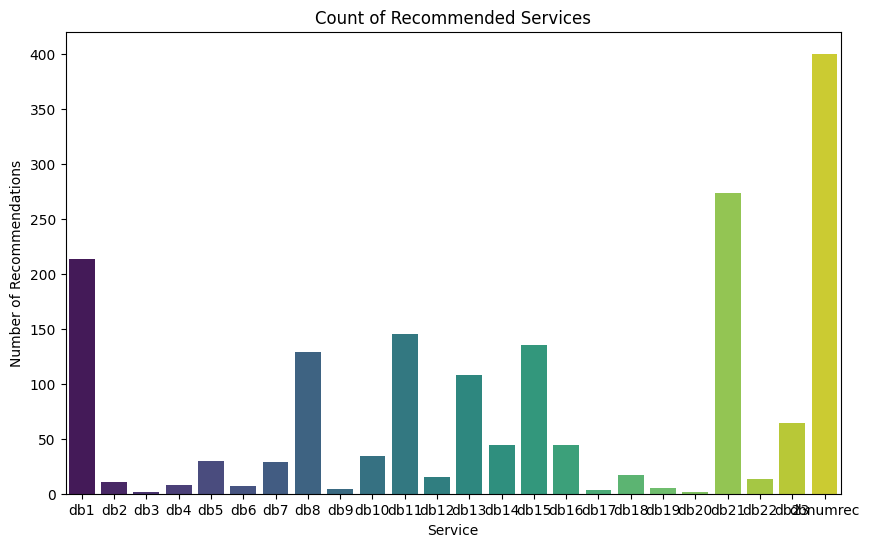

In [40]:
service_counts_df = recc_counts.reset_index()
service_counts_df.columns = ['recomendation', 'count']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=service_counts_df, x='recomendation', y='count', palette='viridis')
plt.title('Count of Recommended Services')
plt.xlabel('Service')
plt.ylabel('Number of Recommendations')
plt.show()

In [42]:
end_treat['interview_date'].unique()

array(['Date on which the interview/genetic test/sampling/imaging/biospecimen was completed. MM/DD/YYYY',
       '10/16/1998', '09/13/1996', '06/10/1996', '07/17/1996',
       '08/31/1996', '10/14/1996', '07/11/1996', '09/13/1998',
       '07/25/1996', '08/28/1996', '07/05/1996', '08/09/1996',
       '04/24/1996', '07/31/1996', '03/31/1997', '10/05/1996', nan,
       '08/13/1996', '07/26/1996', '06/10/1997', '08/26/1997',
       '05/13/1999', '07/13/1999', '09/16/1997', '06/08/1999',
       '08/24/1996', '08/22/1997', '08/16/1998', '06/03/1996',
       '09/10/1997', '01/20/1999', '06/30/1996', '09/25/1997',
       '08/05/1996', '08/20/1996', '08/31/1995', '04/08/1999',
       '08/21/1996', '01/17/1999', '10/08/1997', '08/21/1998',
       '01/19/1997', '09/17/1998', '08/17/1996', '08/23/1999',
       '07/08/1996', '09/11/1996', '06/24/1997', '09/03/1996',
       '09/12/1996', '08/30/1996', '07/31/1998', '07/10/1999',
       '09/04/1996', '06/22/1996', '07/04/1997', '06/02/1997',
       